In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install yfinance

## Get The Data Using Yfinance

In [ ]:
import yfinance as yf

# 1. Initialize
ticker_symbol = "TCS.NS"
ticker = yf.Ticker(ticker_symbol)

# 2. Fetch historical data
data = ticker.history(period="5y", interval="1d")


# 3. Fetch additional info
info = ticker.info
print("Market Cap:", info.get("marketCap"))
print("P/E Ratio:", info.get("trailingPE"))
print("Dividend Yield:", info.get("dividendYield"))

# 4. Display recent data
data.tail(5)

Market Cap: 11029024079872
P/E Ratio: 22.371202
Dividend Yield: 2.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-09-01 00:00:00+05:30,3090.000000,3131.100098,3090.000000,3112.600098,1246862,0.0,0.0
2025-09-02 00:00:00+05:30,3121.100098,3155.000000,3103.100098,3111.500000,2185229,0.0,0.0
2025-09-03 00:00:00+05:30,3129.899902,3141.899902,3088.000000,3097.500000,1799774,0.0,0.0
2025-09-04 00:00:00+05:30,3116.000000,3118.000000,3090.800049,3095.699951,1481391,0.0,0.0
2025-09-05 00:00:00+05:30,3097.100098,3103.399902,3028.600098,3048.300049,2802055,0.0,0.0


In [ ]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-07 00:00:00+05:30,2128.471205,2179.149090,2123.217533,2163.852783,4620401,0.0,0.0
2020-09-08 00:00:00+05:30,2172.128630,2222.806518,2163.852882,2183.519531,7453998,0.0,0.0
2020-09-09 00:00:00+05:30,2161.946581,2193.562144,2157.297234,2164.410645,3866535,0.0,0.0
2020-09-10 00:00:00+05:30,2171.245372,2183.798610,2161.295813,2167.665283,2308813,0.0,0.0
2020-09-11 00:00:00+05:30,2167.479746,2215.879509,2166.735805,2207.603760,4145424,0.0,0.0


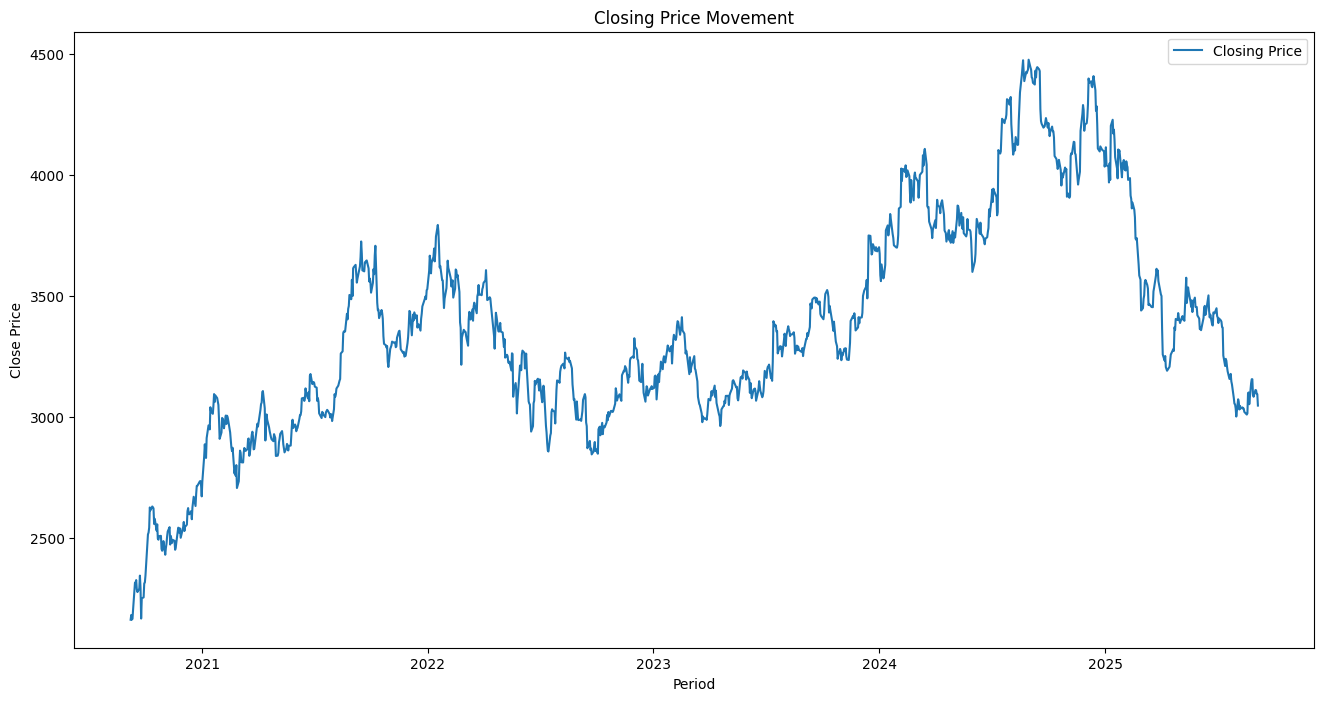

In [ ]:
fig = plt.figure(figsize = (16,8))

plt.plot(data['Close'], label = 'Closing Price')
plt.title("Closing Price Movement")
plt.xlabel("Period")
plt.ylabel("Close Price")
plt.legend()
plt.show()

## Classification Problem : Buy (+1) or Sell(-1) The Stock




In [ ]:

df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df = df.dropna()

In [ ]:
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-09-07 00:00:00+05:30,-35.381579,55.931557
2020-09-08 00:00:00+05:30,-11.390901,58.953636
2020-09-09 00:00:00+05:30,-2.464063,36.264910
2020-09-10 00:00:00+05:30,3.580089,22.502797
2020-09-11 00:00:00+05:30,-40.124014,49.143705


In [ ]:
y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
y

array([ 1, -1,  1, ..., -1, -1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Classification By KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"n_neighbors":list(range(1,31))}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
print("Best Parameter", model.best_params_ ['n_neighbors'])

Best Parameter 23


In [ ]:
pred = model.predict(X_test)

In [ ]:
train_score = accuracy_score(y_train, model.predict(X_train))
test_score = accuracy_score(y_test, model.predict(X_test))
print("Accuracy Score On Training Data: %.2f" %train_score)
print("Accuracy Score On Testing Data: %.2f"  %test_score)

Accuracy Score On Training Data: 0.61
Accuracy Score On Testing Data: 0.55


In [ ]:
actual_test_result = pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':pred })

In [ ]:
actual_test_result.head(20)

,Actual_Value,Predicted_Value
0,-1,1
1,1,-1
2,1,-1
3,1,1
4,1,1
5,1,1
6,-1,-1
7,-1,1
8,-1,1
9,-1,-1


## KNN For Regression

In [ ]:
y = df['Close']
y.head()

,Close
Date,
2020-09-07 00:00:00+05:30,2163.852783
2020-09-08 00:00:00+05:30,2183.519531
2020-09-09 00:00:00+05:30,2164.410645
2020-09-10 00:00:00+05:30,2167.665283
2020-09-11 00:00:00+05:30,2207.603760


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y, test_size = 0.3, random_state = 42)

params = {"n_neighbors": list(range(1,31))}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv = 5)

model.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
pred_reg = model.predict(X_test_reg)

In [ ]:
pred_reg

array([3484.54464518, 3276.0571696 , 3504.15210775, 3323.69042969,
       3688.60323893, 3357.14947103, 3286.03490397, 3468.99984538,
       3219.59403483, 3339.61421712, 3618.58999837, 3474.55574544,
       3278.48516439, 3294.25148112, 3238.56326497, 3247.26444499,
       3535.0740153 , 3333.10660807, 3224.59599609, 3571.86133626,
       3268.53517253, 3325.022111  , 3481.03601888, 3316.42858887,
       3483.74545085, 3464.6925944 , 3420.46114095, 3229.05109863,
       3196.91450195, 3377.47128092, 3159.0554362 , 3269.73978678,
       3538.80467122, 3248.04806315, 3308.77953288, 3274.74820964,
       3399.78667806, 3253.89078776, 3604.24387207, 3212.51361491,
       3171.52811686, 3259.52311198, 3277.3828125 , 3490.92452799,
       3250.39916992, 3319.31180827, 3426.64871419, 3186.95322266,
       3218.50043132, 3430.79353027, 3324.30437826, 3242.08919271,
       3243.7381429 , 3283.04994303, 3494.05167643, 3222.30145671,
       3417.03487142, 3337.26159668, 3276.33404134, 3290.49747

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test_reg, pred_reg)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
print("RMSE:", rmse)

RMSE: 425.06371110305463


In [ ]:
actual_result1 = pd.DataFrame({"Actual_Value":y_test_reg, "Predicted_Value":pred_reg})

In [ ]:
actual_result1.head()

,Actual_Value,Predicted_Value
Date,,
2022-05-11 00:00:00+05:30,3226.750244,3484.544645
2021-09-22 00:00:00+05:30,3639.070801,3276.057170
2022-01-06 00:00:00+05:30,3594.413574,3504.152108
2023-03-06 00:00:00+05:30,3234.732910,3323.690430
2021-02-01 00:00:00+05:30,2937.211426,3688.603239


## Classification By RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y_rf = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y_rf, test_size = 0.3, random_state = 42)

In [ ]:
params = {"n_estimators": [50,100,200]}
rf = RandomForestClassifier(random_state = 42)
model = GridSearchCV (rf, params, cv = 5)
model.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
pred_rf = model.predict(X_test_rf)

In [ ]:
pred_rf

array([ 1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,
        1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1

In [ ]:
accuracy = accuracy_score(y_test_rf, pred_rf)

In [ ]:
print("Accuracy Score:", accuracy)

Accuracy Score: 0.5053763440860215


In [ ]:
actual_result_rf = pd.DataFrame({"Actual Result":y_test_rf, "Predicted Result": pred_rf})

In [ ]:
actual_result_rf.head()

,Actual Result,Predicted Result
0,-1,1
1,1,-1
2,1,1
3,1,1
4,1,1


## RandomForest For Regression